# Capítulo 4. Modelos de Regresión

## Regresión Lineal Simple

In [23]:
import pandas as pd

df = pd.read_csv("../datasets/Salary_Data.csv")
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [24]:
# Caracteristicas o variables independientes
X = df[['YearsExperience']].values

# Variable dependiente u objetivo
y = df.Salary

In [25]:
from sklearn.model_selection import train_test_split

# separación de los datos en conjuntos de entrenamiento y pruebas
X_entren, X_prueba, y_entren, y_prueba = train_test_split(X, y, test_size=0.20, random_state=0)

In [26]:
X_entren.shape, X_prueba.shape, y_entren.shape, y_prueba.shape

((24, 1), (6, 1), (24,), (6,))

In [27]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
reg_lin.fit(X_entren, y_entren)

LinearRegression()

In [28]:
predicciones = reg_lin.predict(X_prueba)
predicciones

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [29]:
print("wo:", format(reg_lin.intercept_,".2f"))
print("w1:",format(reg_lin.coef_[0],".2f"))

wo: 26780.10
w1: 9312.58


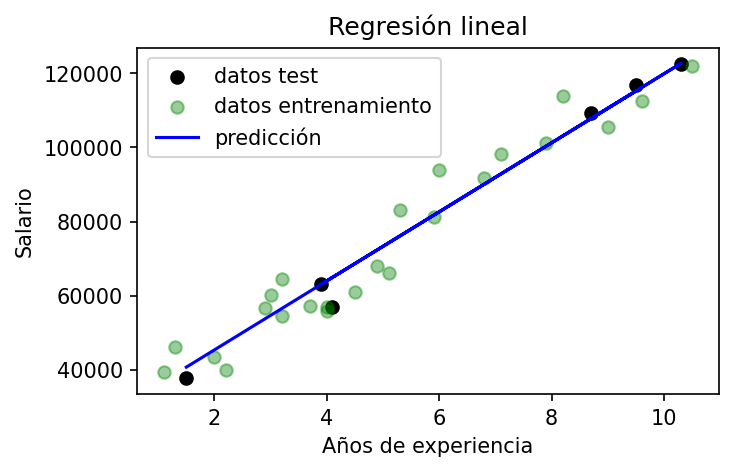

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5,3))

plt.scatter(X_prueba, y_prueba,  color='black',label=r'datos test')
plt.scatter(X_entren, y_entren,  color='green',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_prueba, predicciones, color='blue',label=r'predicción')

plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Regresión lineal')
plt.legend()

## Regresión lineal múltiple

In [91]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [92]:
# Leer archivo CSV
df = pd.read_csv("../datasets/insurance.csv")
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
# codificamos la variable sex
d1 = {'male': 1, 'female':0}
df['sex'] = df['sex'].map(d1)

In [94]:
# codificamos la variable smoker
d2 = {'yes': 1, 'no':0}
df['smoker'] = df['smoker'].map(d2)

In [95]:
# codificamos la variable region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [96]:
# eliminamos la columna index
df.drop(columns='index', inplace=True)

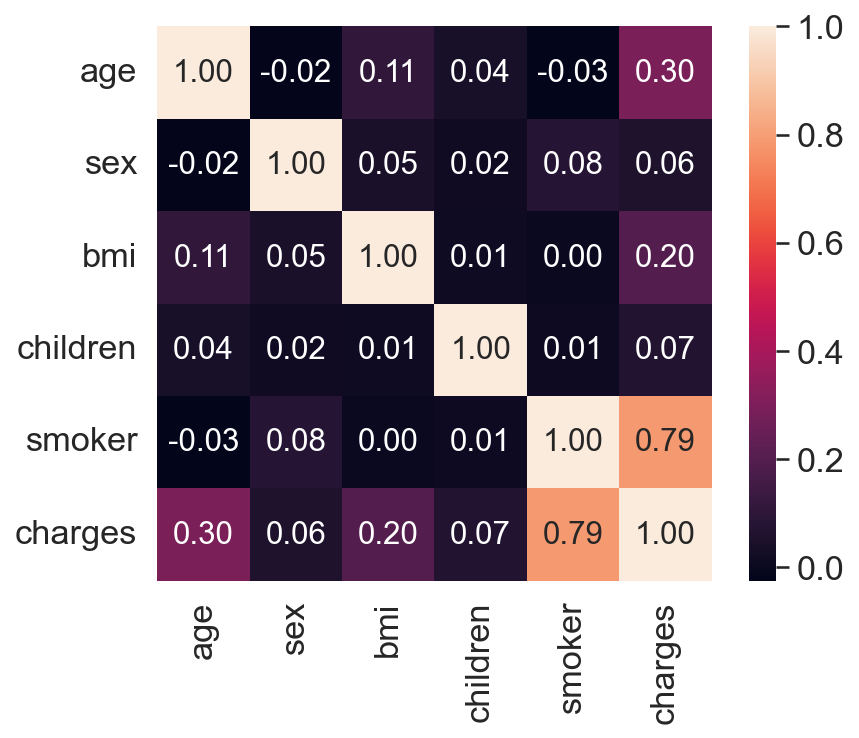

In [97]:
import seaborn as sns
import matplotlib.pyplot as pl
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols
                )
plt.show()

In [98]:
# obtenemos age, bmi y smoker
X = df.iloc[:,:-1]
y = df.iloc[:,5]

In [99]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=1)

In [100]:
reg = LinearRegression()
reg.fit(X_ent, y_ent)

LinearRegression()

In [101]:
y_pred = reg.predict(X_pru)

In [102]:
exactitud = r2_score(y_pru, y_pred)
print(f'La exactitud es: {round(exactitud, 2)}')

La exactitud es: 1.0


In [52]:
prueba = pd.DataFrame({'age': [36], 'bmi':[27], 'smoker': [0] })
print("El cobro del seguro es: ", round(reg.predict(prueba)[0],2))

El cobro del seguro es:  6460.92


In [54]:
print('w1, w2, w3 =',reg.coef_)
print('w0 =',reg.intercept_)

w1, w2, w3 = [  258.96243109   303.37204687 23723.48386217]
w0 = -11052.76794947822


## Regresión polinómica

In [423]:
df = pd.read_csv("../datasets/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [424]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

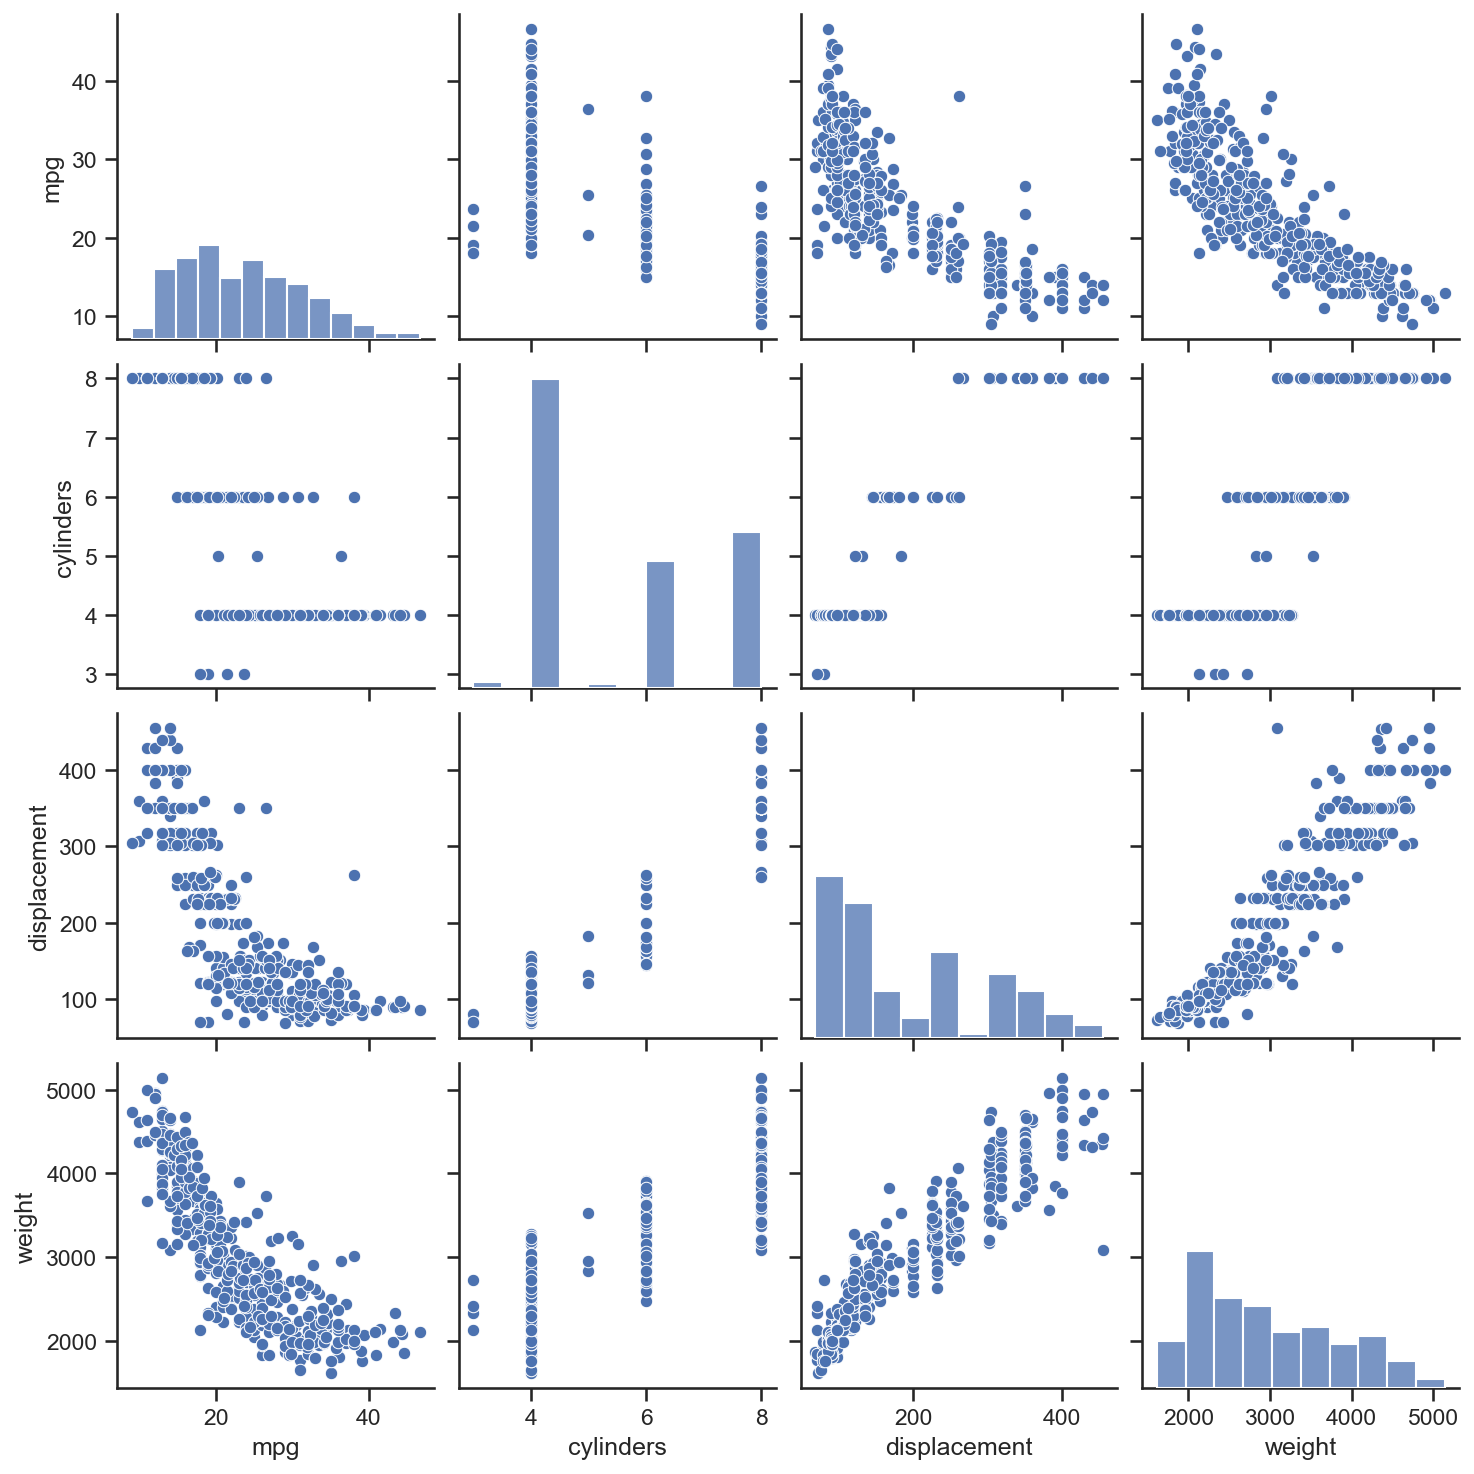

In [425]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data=df,vars=['mpg', 'cylinders', 'displacement', 'weight'])

In [426]:
# Escogemos la variable predictora displacement
X=df[['displacement']].values

# Escogemos la variable objetivo mpg
y=df['mpg'].values

In [427]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size=0.2, random_state=20)

In [428]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polinomio = PolynomialFeatures(degree=2)
X_ent_transformado = polinomio.fit_transform(X_ent)
X_ent_transformado

array([[1.00000e+00, 4.29000e+02, 1.84041e+05],
       [1.00000e+00, 9.10000e+01, 8.28100e+03],
       [1.00000e+00, 4.00000e+02, 1.60000e+05],
       [1.00000e+00, 1.45000e+02, 2.10250e+04],
       [1.00000e+00, 6.80000e+01, 4.62400e+03],
       [1.00000e+00, 1.46000e+02, 2.13160e+04],
       [1.00000e+00, 4.00000e+02, 1.60000e+05],
       [1.00000e+00, 3.18000e+02, 1.01124e+05],
       [1.00000e+00, 3.07000e+02, 9.42490e+04],
       [1.00000e+00, 3.18000e+02, 1.01124e+05],
       [1.00000e+00, 2.62000e+02, 6.86440e+04],
       [1.00000e+00, 2.50000e+02, 6.25000e+04],
       [1.00000e+00, 9.80000e+01, 9.60400e+03],
       [1.00000e+00, 1.20000e+02, 1.44000e+04],
       [1.00000e+00, 8.50000e+01, 7.22500e+03],
       [1.00000e+00, 9.10000e+01, 8.28100e+03],
       [1.00000e+00, 9.70000e+01, 9.40900e+03],
       [1.00000e+00, 1.40000e+02, 1.96000e+04],
       [1.00000e+00, 1.08000e+02, 1.16640e+04],
       [1.00000e+00, 1.21000e+02, 1.46410e+04],
       [1.00000e+00, 2.50000e+02, 6.2500

In [429]:
reg_pol = LinearRegression()
reg_pol.fit(X_ent_transformado, y_ent)
# The coefficients
print ('Coeficientes: ', reg_pol.coef_)
print ('Intercepto: ',reg_pol.intercept_)

Coeficientes:  [ 0.         -0.13534041  0.0001664 ]
Intercepto:  41.44930949555906


Text(0, 0.5, 'MPG')

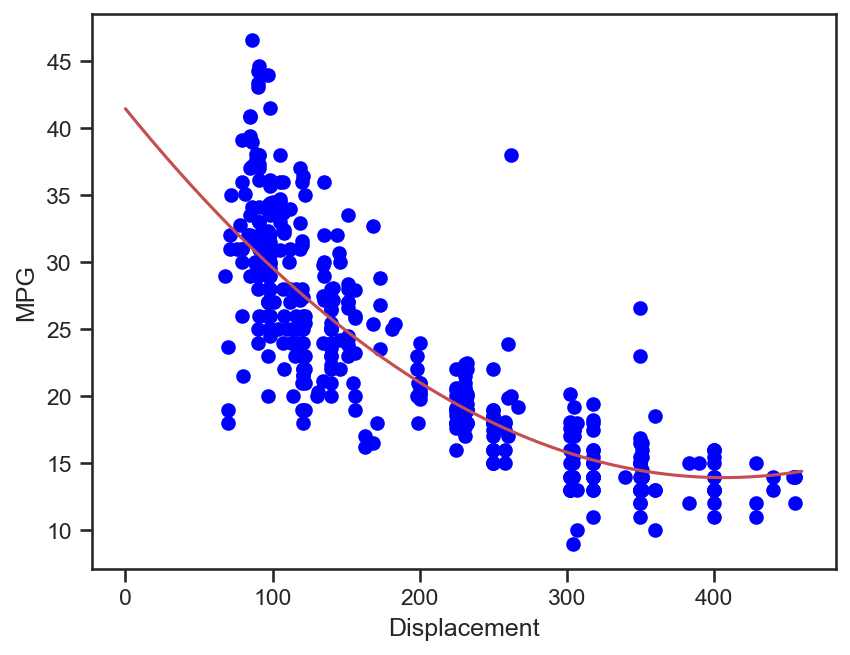

In [366]:
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 460, 0.1)
yy = reg_pol.intercept_+ reg_pol.coef_[1]*XX+ reg_pol.coef_[2]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("Displacement")
plt.ylabel("MPG")

In [367]:
#Modelo de regresion lineal
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
reg_lineal = LinearRegression()
reg_lineal.fit(X_ent,y_ent)

y_pred = reg_lineal.predict(X_pru)

print('MAE: %.3f '% mean_absolute_error(y_pru, y_pred))
print('MSE: %.3f'% mean_squared_error(y_pru, y_pred))
print('R2: %.3f'% r2_score(y_pru, y_pred))

MAE: 4.036 
MSE: 25.102
R2: 0.632


In [368]:
#Modelo de regresion polinómica
pru_X_polin = polinomio.fit_transform(X_pru)
y_pred = reg_pol.predict(pru_X_polin)

print('MAE: %.3f' % mean_absolute_error(y_pru, y_pred))
print('MSE: %.3f' % mean_squared_error(y_pru, y_pred))
print('R2: %.3f'% r2_score(y_pru, y_pred, ))

MAE: 3.479
MSE: 20.945
R2: 0.693


## Métricas de evaluación

In [369]:
# Error absoluto medio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pru, y_pred)
print(f'El Error absoluto medio es: {round(mae, 2)}')

El Error absoluto medio es: 3.48


In [370]:
#Error cuadrático medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pru, y_pred)
print(f'El Error cuadrático medio es: {round(mse, 2)}')

El Error cuadrático medio es: 20.95


In [371]:
from sklearn.metrics import  r2_score
exactitud = r2_score(y_pru, y_pred)
print(f'La exactitud es: {round(exactitud, 2)}')

La exactitud es: 0.69


## Regularización

In [568]:
df = pd.read_csv("../datasets/auto-mpg.csv")

In [569]:
df.drop(columns='car name', inplace=True)

In [570]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [571]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


In [572]:
# Escogemos las variables predictoras
X=df.iloc[:, 1:].values
# Escogemos la variable objetivo mpg
y=df['mpg'].values

In [573]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size=0.2, random_state=20)

In [574]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polinomio2 = PolynomialFeatures(degree=2)
X_ent_transformado = polinomio2.fit_transform(X_ent)
X_pru_transformado = polinomio2.transform(X_pru)

In [575]:
X_ent_transformado.shape

(313, 36)

In [576]:
reg_pol = LinearRegression()
reg_pol.fit(X_ent_transformado, y_ent)

LinearRegression()

In [577]:
print("Coeficientes:", reg_pol.coef_)
print ('Intercepto: ',reg_pol.intercept_)

Coeficientes: [-3.41493793e+07  9.51336784e+00 -6.23157466e-01  7.02581301e-01
 -4.90143957e-02 -6.42224152e+00 -8.31270426e+00 -1.71152383e+01
 -1.87235835e-01  1.10551589e-03 -3.57786504e-02  1.93531235e-03
  1.40840813e-01 -1.52046265e-01 -1.20959411e-01  1.83394374e-04
  7.36142348e-04 -3.71483471e-05 -2.01608246e-05  6.69993422e-03
  5.17288210e-02  1.55802053e-03 -1.32801074e-04  2.29019991e-02
 -1.18916790e-02 -8.33902262e-02  4.42412084e-06 -8.59725011e-04
  5.52707259e-04  1.97538723e-04 -8.51375965e-04  6.55309662e-02
  4.50322458e-01  4.62907058e-02  1.54707953e-01 -1.00659872e-01]
Intercepto:  34149827.99964699


In [578]:
y_pred = reg_pol.predict(X_ent_transformado)
print('R2 con datos de entrenamiento: %.3f'% r2_score(y_ent, y_pred ))

y_pred = reg_pol.predict(X_pru_transformado)
print('R2 con datos de prueba: %.3f'% r2_score(y_pru, y_pred ))

R2 con datos de entrenamiento: 0.840
R2 con datos de prueba: 0.683


### Regularización con Ridge

In [579]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_ent_estand = scaler.fit_transform(X_ent_transformado)
X_pru_estand = scaler.transform(X_pru_transformado)

# Crear y entrenar el modelo de Ridge
ridge_reg = Ridge(alpha=1.0)  # Puedes ajustar el parámetro de regularización alpha
ridge_reg.fit(X_ent_estand, y_ent)

Ridge()

In [580]:
y_pred = ridge_reg.predict(X_ent_estand)
print('R2 con datos de entrenamiento: %.3f'% r2_score(y_ent, y_pred ))

R2 con datos de entrenamiento: 0.876


In [581]:
y_pred = ridge_reg.predict(X_pru_estand)
print('R2 con datos de prueba: %.3f'% r2_score(y_pru, y_pred))

R2 con datos de prueba: 0.898


In [619]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Crear objeto de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Aplicar validación cruzada
scores = cross_val_score(ridge_reg, X_ent_estand, y_ent, cv=cv, scoring='r2')

#Mostrar resultados
print("Puntuaciones de validación cruzada:")
print(scores)
print("Puntuación media de validación cruzada:", scores.mean())
print("Desviación estándar de la puntuación de validación cruzada:", scores.std())

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

### Búsqueda de cuadrícula para encontrar los hiperparámetros óptimos

In [617]:
# Buscar el mejor valor para lambda con busqueda de cuadrícula
from sklearn.model_selection import GridSearchCV

ridge_reg = Ridge()
grilla = GridSearchCV(ridge_reg, {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10,100]}, cv=5, scoring='r2', 
         verbose=1)
grilla.fit(X_ent_estand, y_ent)
print("El mejor valor de lambda es:", grilla.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
El mejor valor de lambda es: {'alpha': 0.1}


In [605]:
ridge_reg2 = Ridge(alpha = 0.1)
ridge_reg2.fit(X_ent_estand, y_ent)
y_pred = ridge_reg2.predict(X_pru_estand)
print(f"R2: {r2_score(y_pru, y_pred):.3f}")

R2: 0.892


### Regularización con Lasso

In [597]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1) 
lasso_reg.fit(X_ent_estand, y_ent)

y_pred = lasso_reg.predict(X_pru_estand)
print(f"R2: {r2_score(y_pru, y_pred):.2f}")

R2: 0.89


### Regularización con ElasticNet

In [599]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.2)
en.fit(X_ent_estand, y_ent)

y_pred = en.predict(X_pru_estand)
print(f"R2: {r2_score(y_pru, y_pred):.2f}")

R2: 0.89
